## Extracting profile between and beyond 2 points on surface

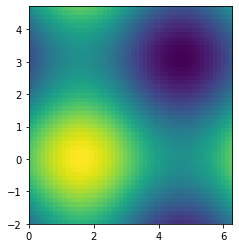

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

extent = [0, 2*np.pi, -2, 1.5*np.pi]
xs = np.linspace(0, 2 * np.pi)
ys = np.linspace(-2, 1.5 * np.pi)
X = np.meshgrid(xs, ys)

def z(X, neg=False):
    mul = -1 if neg else 1
    return mul * (np.sin(X[0]) + np.cos(X[1]))

plt.imshow(z(X), extent=extent, origin='lower')

But this approximation feels cheap. 

## Get the min and max via optimization

In [2]:
from scipy.optimize import minimize

minX = minimize(z, x0=[3.14, 1.55])
maxX = minimize(z, x0=[3.14, 1.55], args=(True))

minx, miny = minX.x
maxx, maxy = maxX.x

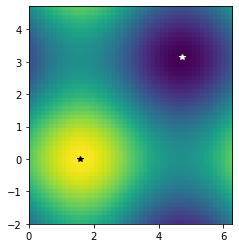

In [3]:
plt.imshow(z(X), origin='lower', extent=extent)
plt.plot(minx, miny, "*", c='w')
plt.plot(maxx, maxy, "*", c='k')

## Get the line to extract

In [4]:
grad = (maxy - miny) / (maxx - minx)
bias = miny - (grad * minx)

linex = xs
liney = grad * linex + bias

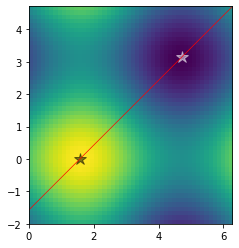

In [5]:
plt.imshow(z(X), origin='lower', extent=extent)
plt.plot(minx, miny, "*", c='w', ms=12, alpha=0.5)
plt.plot(maxx, maxy, "*", c='k', ms=12, alpha=0.5)
plt.plot(linex, liney, c='r', lw=0.67)

## Extract the profile

In [6]:
from scipy.interpolate import interp2d

f = interp2d(X[0], X[1], z(X), kind='cubic')

In [7]:
profile = np.array([f(xi, yi) for xi, yi in zip(linex, liney)]).reshape(-1)

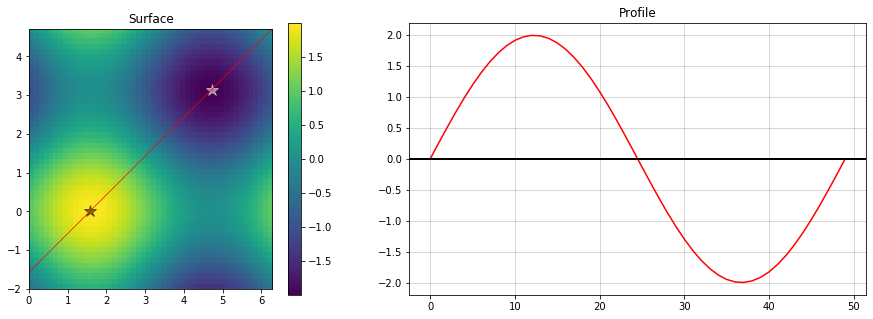

In [9]:
fig, axs = plt.subplots(ncols=2,
                        figsize=(15, 5),
                        gridspec_kw={'width_ratios': [1, 1.5]})

ax = axs[0]
im = ax.imshow(z(X), origin='lower', extent=extent, aspect=1)
ax.plot(minx, miny, "*", c='w', ms=12, alpha=0.5)
ax.plot(maxx, maxy, "*", c='k', ms=12, alpha=0.5)
ax.plot(linex, liney, c='r', lw=0.67)
ax.set_title("Surface")
plt.colorbar(im, ax=ax)

ax = axs[1]
ax.plot(profile, c='r')
ax.set_title("Profile")
ax.axhline(0, color='k', lw=2)
ax.grid(color='k', alpha=0.2)

plt.show()